In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
!pip install statsforecast
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, AutoARIMA
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.5/223.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 18.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
df = pd.read_csv("/content/dados_ipea.csv", sep=";", decimal=",")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13481 entries, 0 to 13480
Data columns (total 3 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Data                                                                                                     13481 non-null  object 
 1   Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366  11150 non-null  float64
 2   Unnamed: 2                                                                                               0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 316.1+ KB


In [ ]:
df.head()

,Data,Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366,Unnamed: 2
0,20/05/1987,18.63,NaN
1,21/05/1987,18.45,NaN
2,22/05/1987,18.55,NaN
3,23/05/1987,NaN,NaN
4,24/05/1987,NaN,NaN


In [ ]:
df.rename(columns={"Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366": "Preco"}, inplace=True)

In [ ]:
df.drop("Unnamed: 2", axis=1, inplace=True)

In [ ]:
df['Data'].value_counts()

Data
20/05/1987    1
13/01/2012    1
20/12/2011    1
21/12/2011    1
22/12/2011    1
             ..
12/09/1999    1
13/09/1999    1
14/09/1999    1
15/09/1999    1
15/04/2024    1
Name: count, Length: 13481, dtype: int64

In [ ]:
df['Data'] = pd.to_datetime(df['Data'])
df['Preco'] = df['Preco'].astype(float)

<ipython-input-9-f20131967914>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data'] = pd.to_datetime(df['Data'])


In [ ]:
df.shape

(13481, 2)

In [ ]:
df.describe()

,Data,Preco
count,13481,11150.000000
mean,2005-11-01 00:00:00,52.966105
min,1987-05-20 00:00:00,9.100000
25%,1996-08-10 00:00:00,20.480000
50%,2005-11-01 00:00:00,48.105000
75%,2015-01-23 00:00:00,76.210000
max,2024-04-15 00:00:00,143.950000
std,NaN,33.227351


In [ ]:
df_atualizado = df.fillna(method='ffill', axis=0)

In [ ]:
df_atualizado.head()

,Data,Preco
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-23,18.55
4,1987-05-24,18.55


Text(0.5, 1.0, 'Preço petróleo ao longo dos anos')

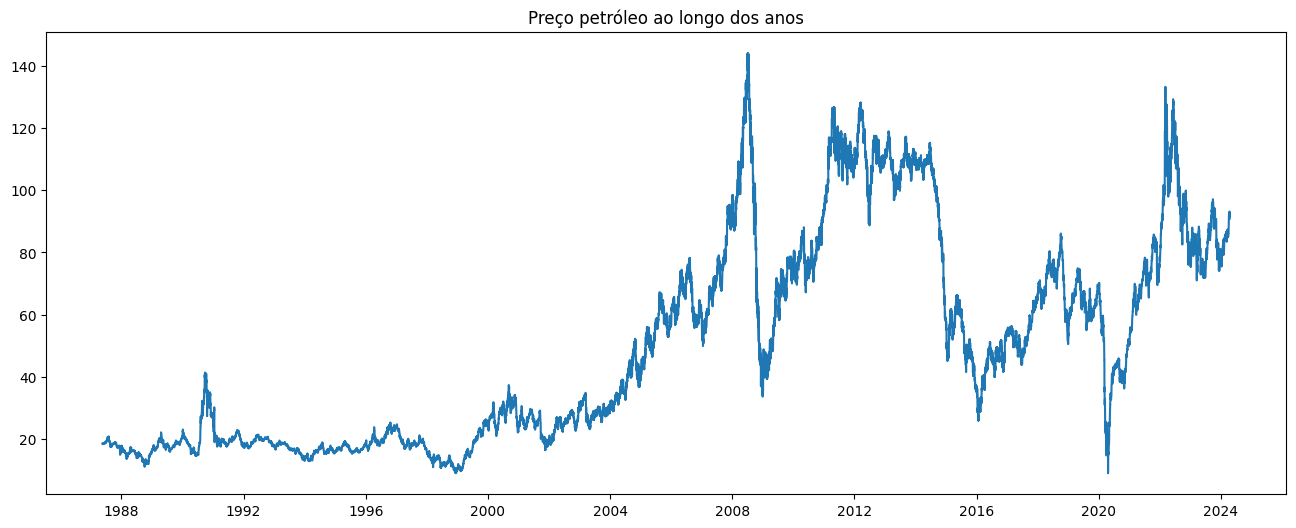

In [ ]:
# definindo o tamanho do plot
plt.figure(figsize = (16, 6))
# plotando o gráfico
plt.plot(df_atualizado['Data'], df_atualizado['Preco'])
# definindo o título
plt.title("Preço petróleo ao longo dos anos")

In [ ]:
df_atualizado.duplicated().sum()

0

In [ ]:
dados = df_atualizado.set_index('Data', drop=True)
dados.head()

,Preco
Data,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-23,18.55
1987-05-24,18.55


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13481 entries, 1987-05-20 to 2024-04-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preco   13481 non-null  float64
dtypes: float64(1)
memory usage: 210.6 KB


In [ ]:
resultados = seasonal_decompose(dados)

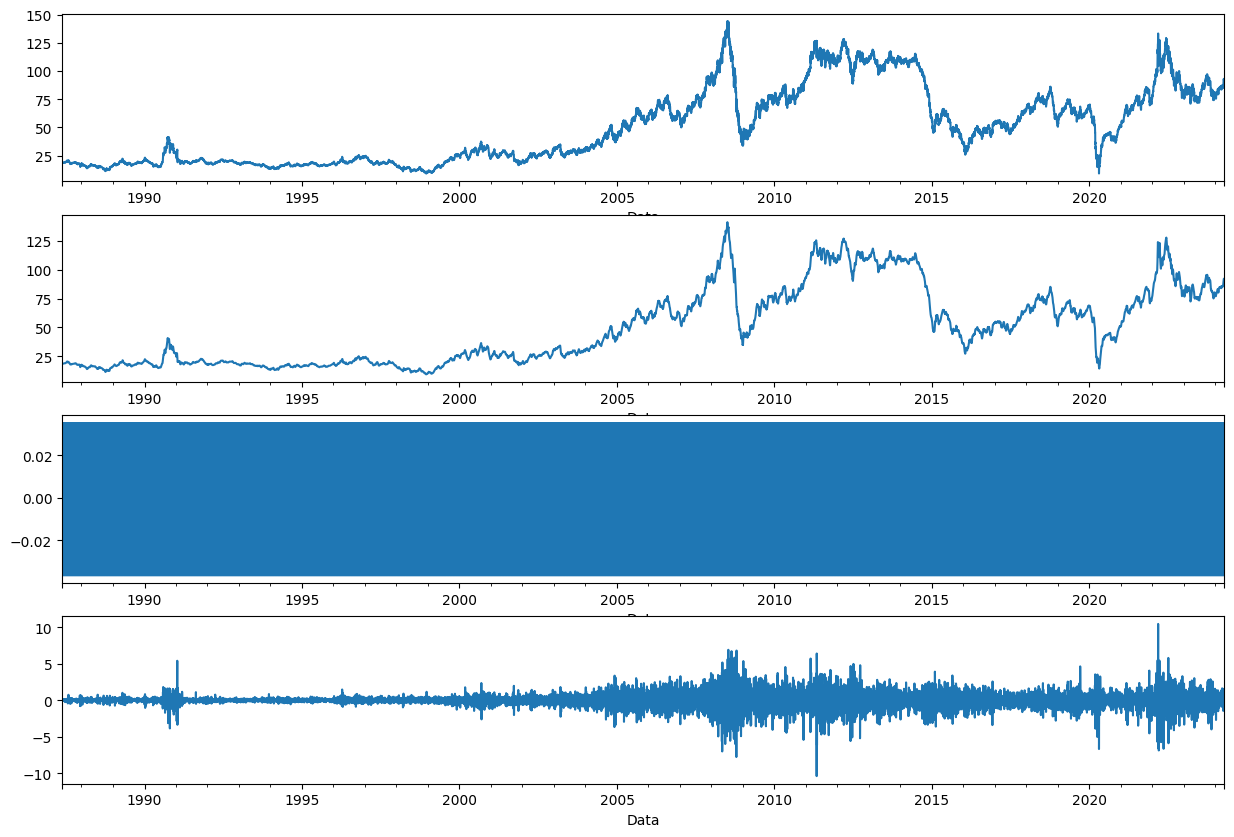

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.show()

In [ ]:
# Estacionária ou não estacionária

# ADF - Augmented Dickey Fuller

# H0 - Hipotese nula (não é estacionaria)
# H1 - Hipotese alternativa (rejeição da hipotese nula)

# p -value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

x = dados['Preco'].values

result = adfuller(x)

print('Teste ADF')
print('Teste Estatistico: ', result[0])
print('P-value: ', result[1])
print('Valores criticos: ')

for key, value in result[4].items():
    print(f'\t{key}:{value}')

Teste ADF
Teste Estatistico:  -1.9649604636430615
P-value:  0.3021448055119741
Valores criticos: 
	1%:-3.430836684239235
	5%:-2.8617550915451226
	10%:-2.566884488356167


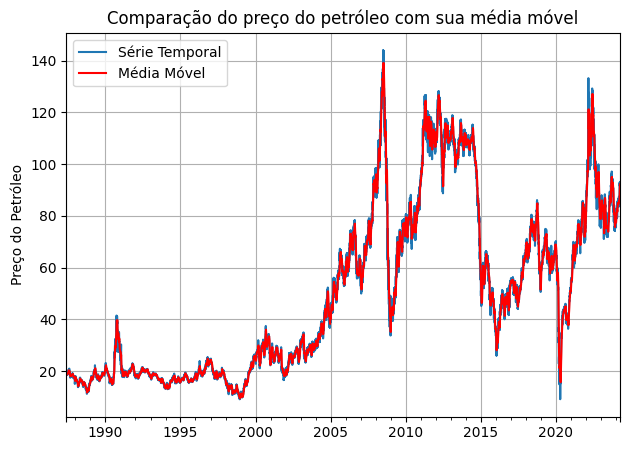

In [ ]:
ma = dados.rolling(12).mean()

f, ax = plt.subplots()
dados.plot(ax=ax,legend=False)
ma.plot(ax=ax,legend=False,color='r')
plt.title("Comparação do preço do petróleo com sua média móvel")
plt.xlabel(' ')
plt.ylabel('Preço do Petróleo')
plt.tight_layout()
plt.legend(['Série Temporal', 'Média Móvel'])
plt.grid()
plt.show()

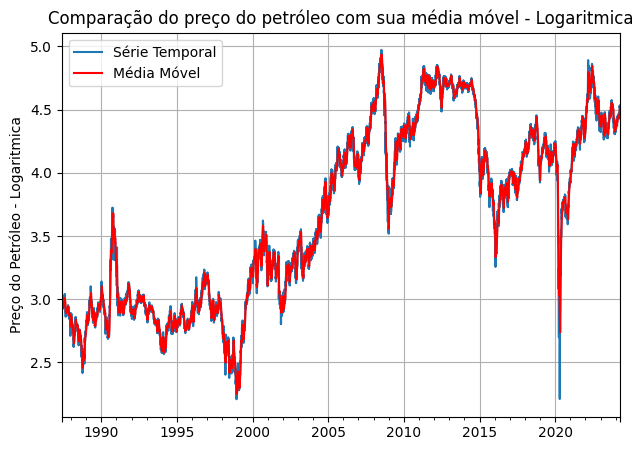

In [ ]:
df_log = np.log(dados)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax,legend=False)
ma_log.plot(ax=ax,legend=False,color='r')
plt.title("Comparação do preço do petróleo com sua média móvel - Logaritmica")
plt.xlabel(' ')
plt.ylabel('Preço do Petróleo - Logaritmica')
plt.grid()
plt.legend(['Série Temporal', 'Média Móvel'])
plt.tight_layout()
plt.show()

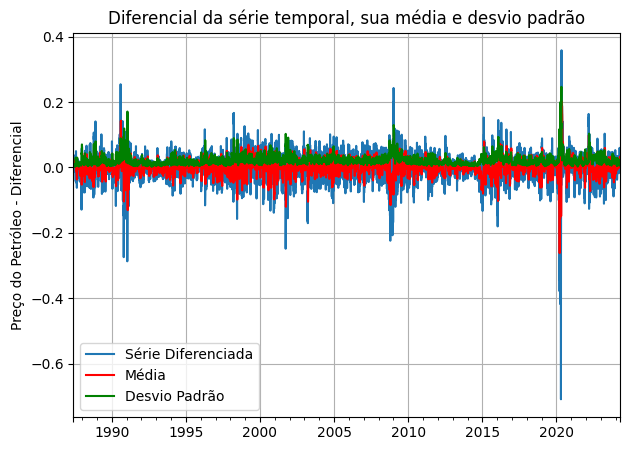

In [ ]:
df_s=(df_log - ma_log).dropna()


ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax,legend=False)
ma_s.plot(ax=ax,legend=False,color='r')
std.plot(ax=ax,legend=False,color='g')
plt.title("Diferencial da série temporal, sua média e desvio padrão")
plt.xlabel(' ')
plt.ylabel('Preço do Petróleo - Diferencial')
plt.grid()
plt.legend(['Série Diferenciada', 'Média', 'Desvio Padrão'])
plt.tight_layout()
plt.show()

In [ ]:
x_s = df_s['Preco'].values

result_s = adfuller(x_s)

print('Teste ADF')
print('Teste Estatistico: ', result_s[0])
print('P-value: ', result_s[1])
print('Valores criticos: ')

for key, value in result_s[4].items():
    print(f'\t{key}:{value}')

Teste ADF
Teste Estatistico:  -16.06167601066624
P-value:  5.630064774120005e-29
Valores criticos: 
	1%:-3.430836937920077
	5%:-2.861755203650932
	10%:-2.566884548029144


In [ ]:
df_diferenciado = df_s.reset_index(drop=False, inplace=False)
print(df_diferenciado)

            Data     Preco
0     1987-05-31  0.000272
1     1987-06-01  0.003943
2     1987-06-02  0.004518
3     1987-06-03  0.007365
4     1987-06-04  0.007937
...          ...       ...
13465 2024-04-11  0.011011
13466 2024-04-12  0.022206
13467 2024-04-13  0.015742
13468 2024-04-14  0.010678
13469 2024-04-15 -0.014331

[13470 rows x 2 columns]


In [ ]:
def categorizar_variacao(var):
  if var > 0:
    return "alta"
  elif var < 0:
    return "baixa"
  else:
    return "neutro"

In [ ]:
df_diferenciado.info()
df_diferenciado["Indice"] = df_diferenciado["Preco"].apply(categorizar_variacao)
df_diferenciado_categorizada = df_diferenciado.rename(columns={'Data': 'ds','Preco': 'y','Indice': 'unique_id'})
print(df_diferenciado_categorizada)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13470 entries, 0 to 13469
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    13470 non-null  datetime64[ns]
 1   Preco   13470 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 210.6 KB
              ds         y unique_id
0     1987-05-31  0.000272      alta
1     1987-06-01  0.003943      alta
2     1987-06-02  0.004518      alta
3     1987-06-03  0.007365      alta
4     1987-06-04  0.007937      alta
...          ...       ...       ...
13465 2024-04-11  0.011011      alta
13466 2024-04-12  0.022206      alta
13467 2024-04-13  0.015742      alta
13468 2024-04-14  0.010678      alta
13469 2024-04-15 -0.014331     baixa

[13470 rows x 3 columns]


In [ ]:
treino = df_diferenciado_categorizada.loc[(df_s.index > '2017-01-01') & (df_s.index < '2023-10-31')]
teste = df_diferenciado_categorizada.loc[df_s.index >= '2023-11-01']
h = teste.index.nunique()
h
treino

,ds,y,unique_id
10809,2017-01-02,0.015136,alta
10810,2017-01-03,0.014439,alta
10811,2017-01-04,0.005666,alta
10812,2017-01-05,0.010277,alta
10813,2017-01-06,0.009825,alta
...,...,...,...
13297,2023-10-26,-0.037821,baixa
13298,2023-10-27,-0.009128,baixa
13299,2023-10-28,-0.008889,baixa
13300,2023-10-29,-0.007261,baixa


In [ ]:
def wmape(y_true, y_pred):
  #print(y_true)
  #print(y_pred)
  return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 80.22%


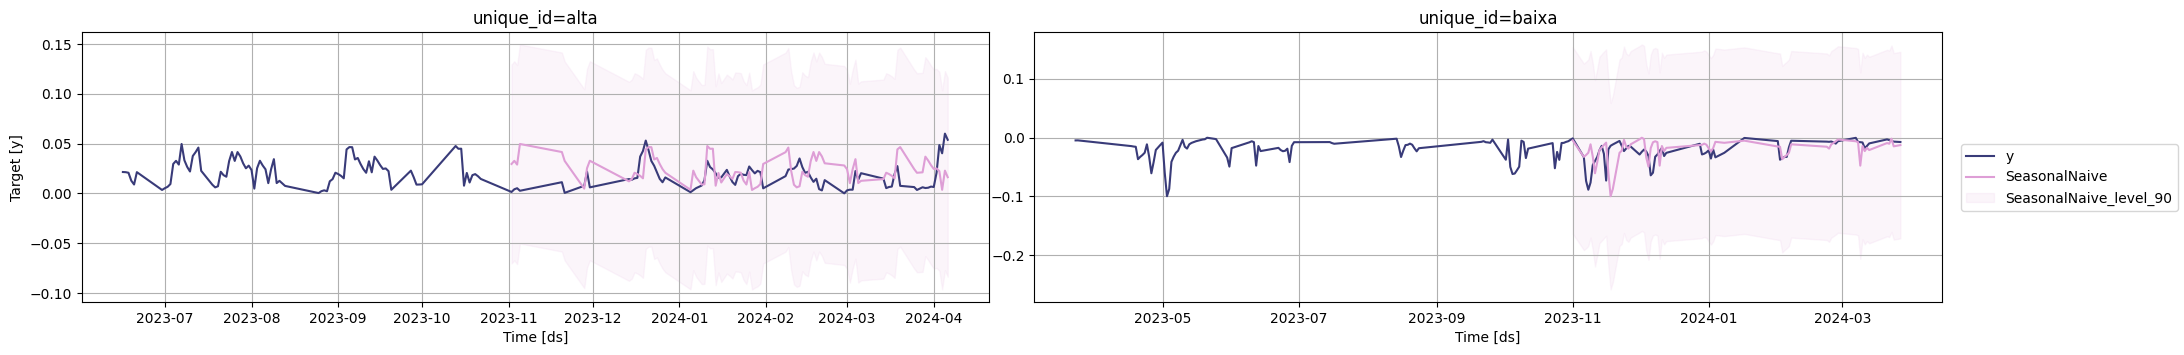

In [ ]:
model = StatsForecast(models=[SeasonalNaive(season_length=90)], freq='D', n_jobs=-1)
model.fit(treino)
forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(teste)
forecast_df = forecast_df.dropna()
wmape1 = wmape(forecast_df['y'].values, forecast_df['SeasonalNaive'].values)
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_df, level=[90], unique_ids=['alta','baixa'], engine='matplotlib', max_insample_length=90)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 81.41%


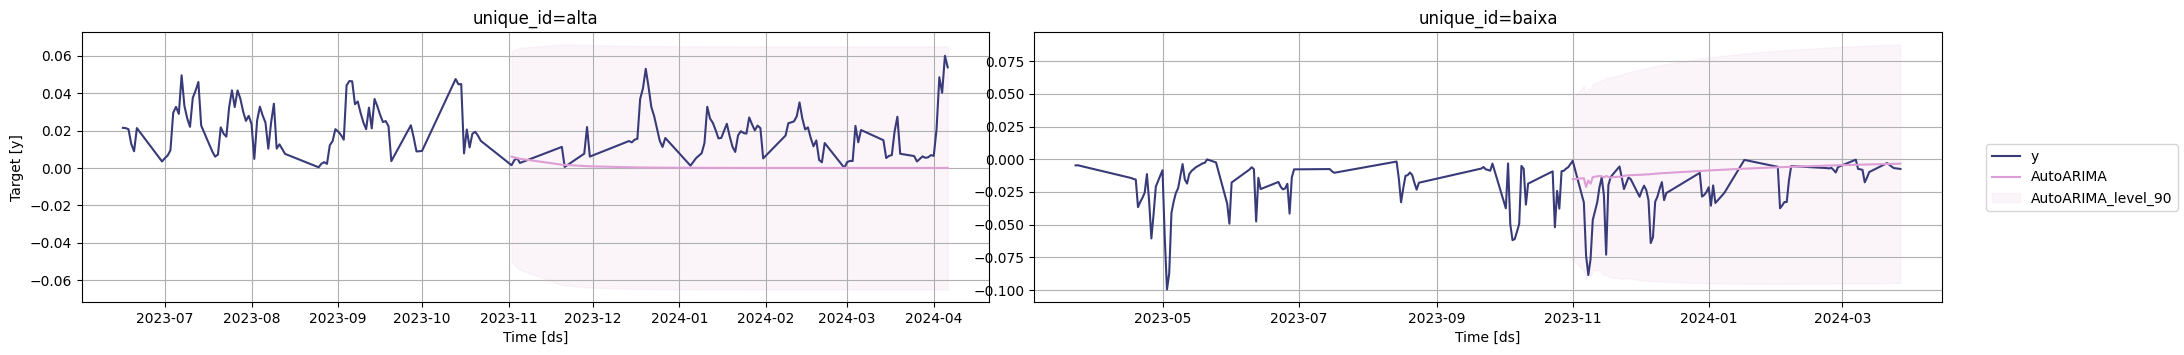

In [ ]:
model_arima = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
model_arima.fit(treino)
forecast_dfa = model_arima.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(teste)
forecast_dfa = forecast_dfa.dropna()
wmape2 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape2:.2%}")

model_arima.plot(treino, forecast_dfa, level=[90], unique_ids=['alta','baixa'], engine='matplotlib', max_insample_length=90)

In [ ]:
df_prophet = dados.reset_index()
df_prophet = df_prophet[['Data', 'Preco']]

In [ ]:
df_prophet = df_prophet.rename(columns={'Data': 'ds', 'Preco': 'y'})
# verificando as primeiras 5 linhas
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13481 entries, 0 to 13480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      13481 non-null  datetime64[ns]
 1   y       13481 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 210.8 KB


In [ ]:
# instanciando o modelo
m = Prophet()
# realizando o treinamento
m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpruk7bs86/7o4w9ok9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpruk7bs86/nvn5yej9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75248', 'data', 'file=/tmp/tmpruk7bs86/7o4w9ok9.json', 'init=/tmp/tmpruk7bs86/nvn5yej9.json', 'output', 'file=/tmp/tmpruk7bs86/prophet_modelsx1fu42h/prophet_model-20240625222645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:26:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:26:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods = 365)
# previsão do modelo
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1987-05-20,16.473384,3.168492,30.275054
1,1987-05-21,16.561303,3.464815,30.007394
2,1987-05-22,16.610425,3.100153,29.308245
3,1987-05-23,16.612871,2.713082,30.171037
4,1987-05-24,16.650391,4.116611,30.450366


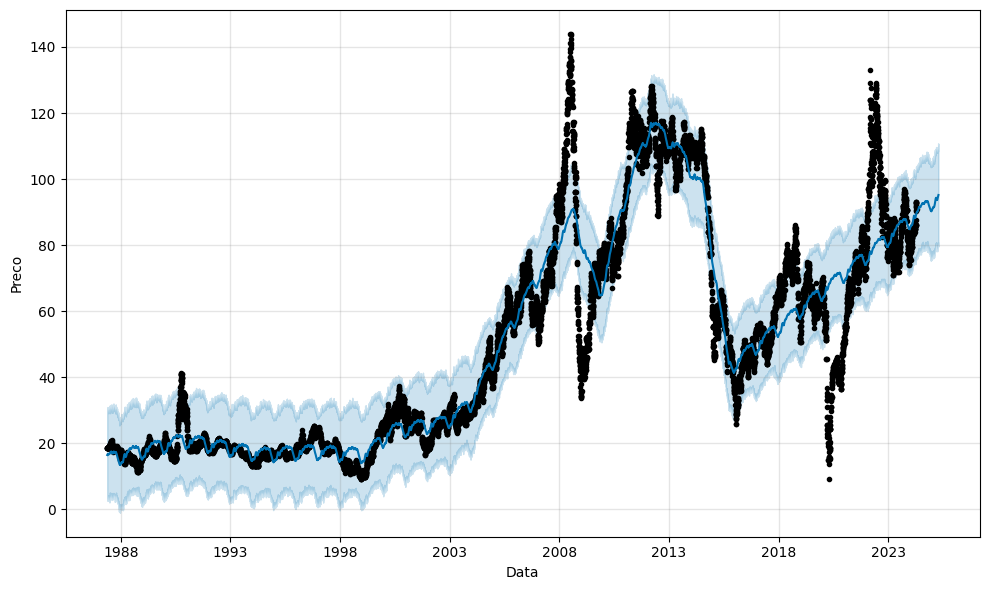

In [ ]:
# previsões do modelo treinado
figure = m.plot(forecast, xlabel = 'Data', ylabel = 'Preco')

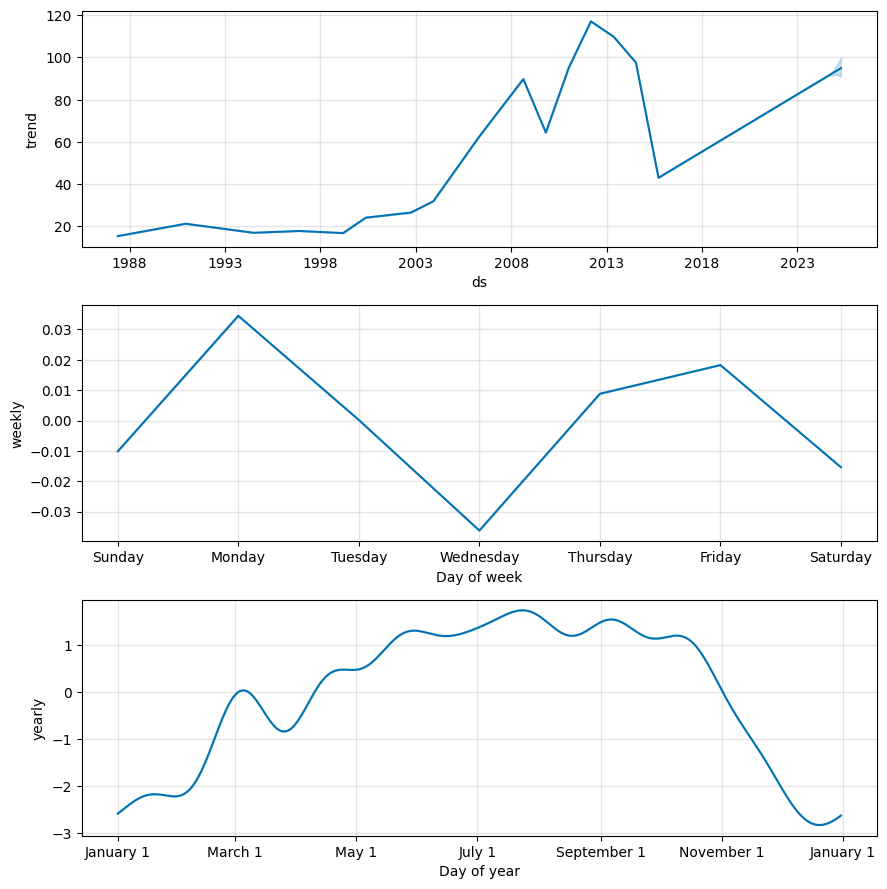

In [ ]:
figure2 = m.plot_components(forecast)

In [ ]:
y_train, y_test = train_test_split(df_prophet, test_size = 0.2, shuffle = False) #separação em treino e teste

In [ ]:
y_train

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-23,18.55
4,1987-05-24,18.55
...,...,...
10779,2016-11-22,46.10
10780,2016-11-23,46.54
10781,2016-11-24,45.96
10782,2016-11-25,46.10


In [ ]:
y_test

,ds,y
10784,2016-11-27,47.54
10785,2016-11-28,46.32
10786,2016-11-29,44.68
10787,2016-11-30,47.95
10788,2016-12-01,46.64
...,...,...
13476,2024-04-11,91.49
13477,2024-04-12,93.12
13478,2024-04-13,93.12
13479,2024-04-14,93.12


In [ ]:
# definindo uma data de corte de acordo com
data_fim = '2022-07-14'
# definindo os dados de treino, antes da data de corte
train = df_prophet.loc[df_prophet['ds'] <= data_fim]
# definindo os dados de teste posterior a data de corte
test = df_prophet.loc[df_prophet['ds'] > data_fim]

In [ ]:
# contando a quantidade de dias à frente para checar a acurácia da previsão
dias_a_prever = len(test.ds.unique())
# checando a quantidade de dias
dias_a_prever

641

Text(0.5, 1.0, 'Preço médio nos dados de treino e teste')

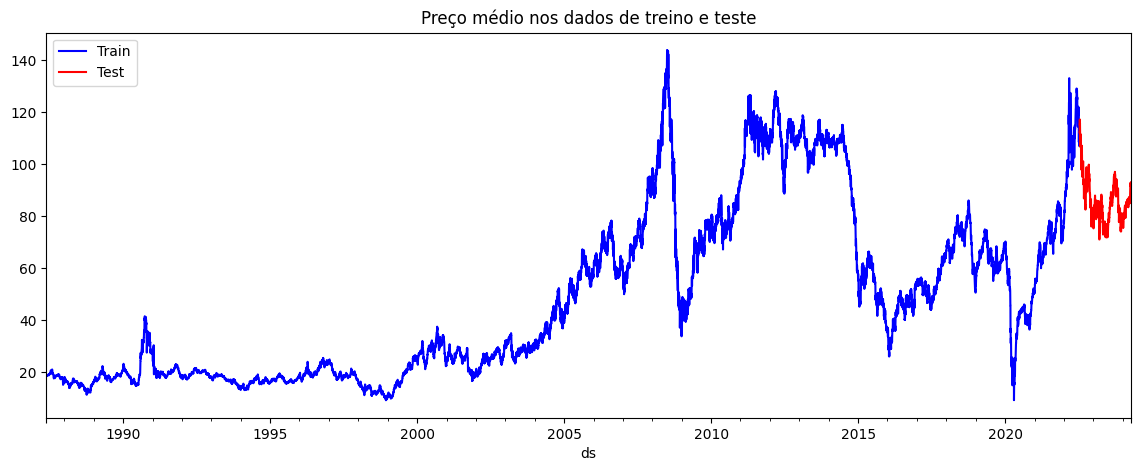

In [ ]:
# definindo o tamanho do plot
f, ax = plt.subplots(figsize=(14,5))
# plotando os dados de treino
train.plot(kind='line', x='ds', y='y', color='blue', label='Train', ax=ax)
# plotando os dados de teste
test.plot(kind='line', x='ds', y='y', color='red', label='Test', ax=ax)
# definindo o título
plt.title('Preço médio nos dados de treino e teste')

In [ ]:
# criando a função MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# instanciando o modelo
m = Prophet()
# realizando o treinamento
m.fit(train)
# método auxiliar para previsão
future = m.make_future_dataframe(periods=dias_a_prever)
# previsão do modelo
forecast = m.predict(future)
# olhando os resultados das previsões com os dados de treino
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpruk7bs86/kemnnc7r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpruk7bs86/80x78lxw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85678', 'data', 'file=/tmp/tmpruk7bs86/kemnnc7r.json', 'init=/tmp/tmpruk7bs86/80x78lxw.json', 'output', 'file=/tmp/tmpruk7bs86/prophet_model8dho0v34/prophet_model-20240625222853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:28:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:29:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
13476,2024-04-11,86.234246,66.973516,106.444528
13477,2024-04-12,86.289562,66.657788,106.796031
13478,2024-04-13,86.332794,66.210275,106.803862
13479,2024-04-14,86.413301,66.277649,107.801864
13480,2024-04-15,86.533311,65.323758,106.442758


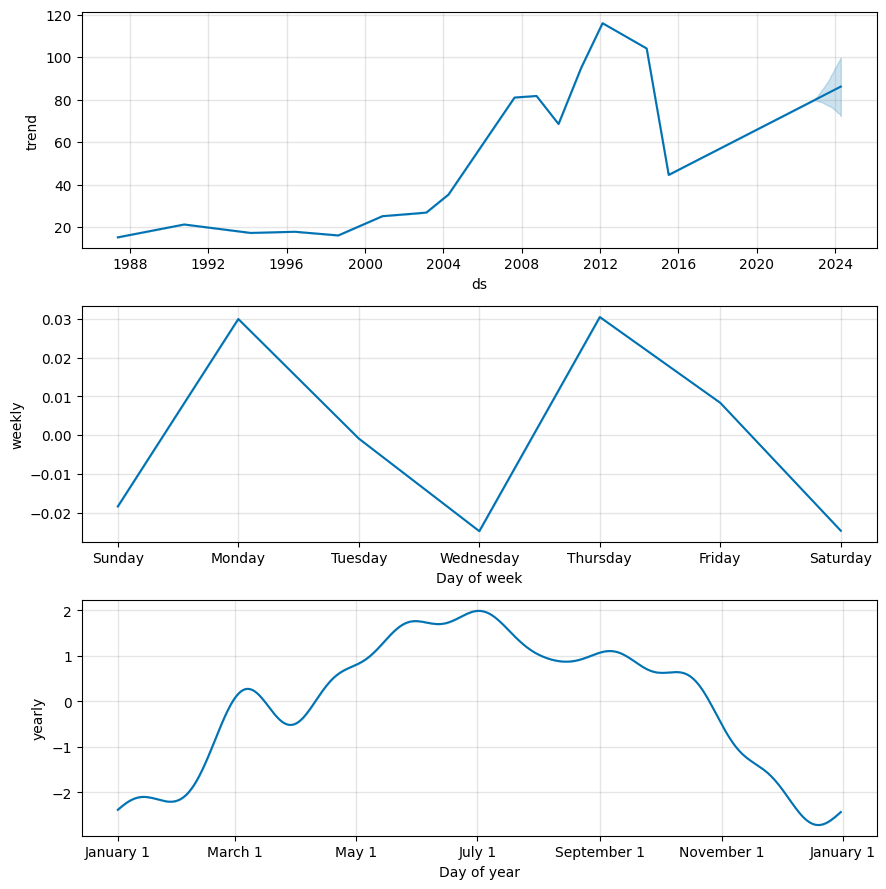

In [ ]:
# Plotando os componentes
figure2 = m.plot_components(forecast)

Text(0.5, 1.0, 'Previsões nos dados de treino')

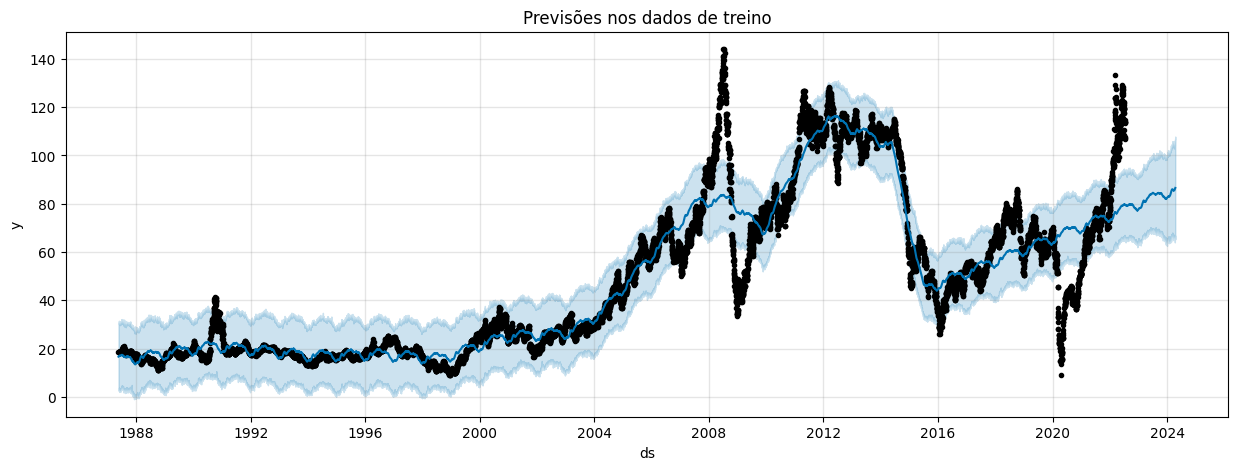

In [ ]:
# configurando a área de plotagem
fig, ax = plt.subplots(1)
# alterando a altura
fig.set_figheight(5)
# alterando a largura
fig.set_figwidth(15)
# plotando o gráfico
fig = m.plot(forecast, ax=ax)
# definindo o título
plt.title('Previsões nos dados de treino')

In [ ]:
# fazendo previsões com os dados de teste
test_forecast = m.predict(test)
# olhando os resultados das previsões com os dados de teste
test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
634,2024-04-09,86.047511,66.357806,105.791077
635,2024-04-10,86.101142,64.792741,107.106538
636,2024-04-11,86.234246,66.266084,106.662338
637,2024-04-12,86.289562,65.931776,107.021010
638,2024-04-13,86.332794,67.148479,106.227756
639,2024-04-14,86.413301,67.091234,106.572809
640,2024-04-15,86.533311,65.882943,107.693318


In [ ]:
test_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-15,77.907322,66.930052,94.290127,77.907322,77.907322,1.664642,1.664642,1.664642,0.008318,0.008318,0.008318,1.656324,1.656324,1.656324,0.0,0.0,0.0,79.571965
1,2022-07-16,77.920283,65.642295,93.986661,77.920283,77.920283,1.587338,1.587338,1.587338,-0.024650,-0.024650,-0.024650,1.611988,1.611988,1.611988,0.0,0.0,0.0,79.507621
2,2022-07-17,77.933244,65.922621,92.981678,77.933244,77.933244,1.548699,1.548699,1.548699,-0.018392,-0.018392,-0.018392,1.567091,1.567091,1.567091,0.0,0.0,0.0,79.481943
3,2022-07-18,77.946204,66.236778,93.304820,77.946204,77.946204,1.552006,1.552006,1.552006,0.029936,0.029936,0.029936,1.522070,1.522070,1.522070,0.0,0.0,0.0,79.498211
4,2022-07-19,77.959165,66.368126,93.738752,77.959165,77.959165,1.476444,1.476444,1.476444,-0.000889,-0.000889,-0.000889,1.477333,1.477333,1.477333,0.0,0.0,0.0,79.435609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2024-04-11,86.150340,66.266084,106.662338,72.789157,99.846659,0.083906,0.083906,0.083906,0.030442,0.030442,0.030442,0.053463,0.053463,0.053463,0.0,0.0,0.0,86.234246
637,2024-04-12,86.163300,65.931776,107.021010,72.778570,99.943029,0.126262,0.126262,0.126262,0.008318,0.008318,0.008318,0.117944,0.117944,0.117944,0.0,0.0,0.0,86.289562
638,2024-04-13,86.176261,67.148479,106.227756,72.767983,100.004484,0.156532,0.156532,0.156532,-0.024650,-0.024650,-0.024650,0.181182,0.181182,0.181182,0.0,0.0,0.0,86.332794
639,2024-04-14,86.189222,67.091234,106.572809,72.757396,100.052524,0.224079,0.224079,0.224079,-0.018392,-0.018392,-0.018392,0.242471,0.242471,0.242471,0.0,0.0,0.0,86.413301


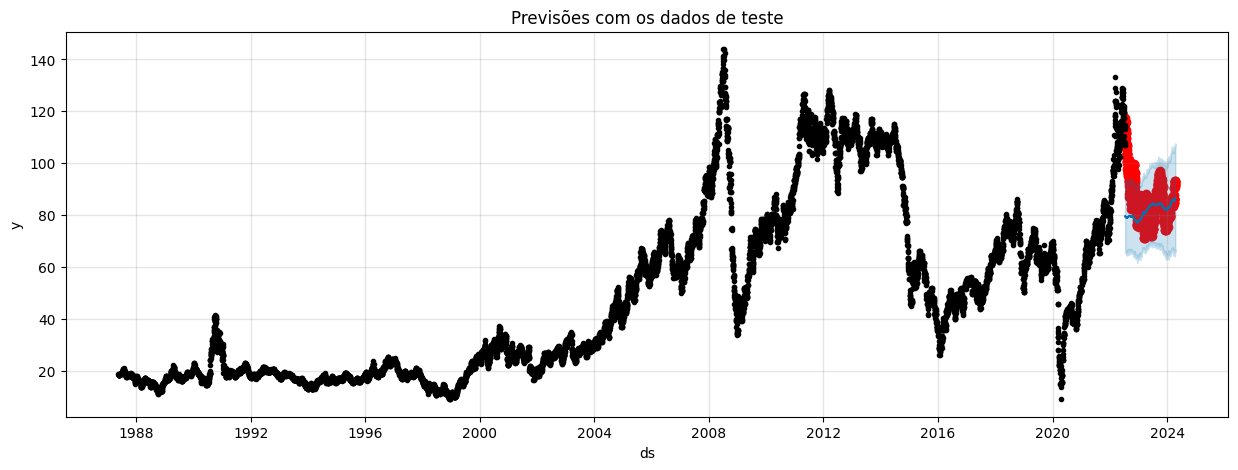

In [ ]:
# configurando a área de plotagem
fig, ax = plt.subplots(1)
# alterando a altura
fig.set_figheight(5)
# alterando a largura
fig.set_figwidth(15)
# adicionando os dados de teste
ax.scatter(test.ds, test['y'], color='r')
# plotando o gráfico
fig = m.plot(test_forecast, ax=ax)
# definindo o título
plt.title('Previsões com os dados de teste');

Text(0.5, 1.0, 'Dados de teste vs Previsões')

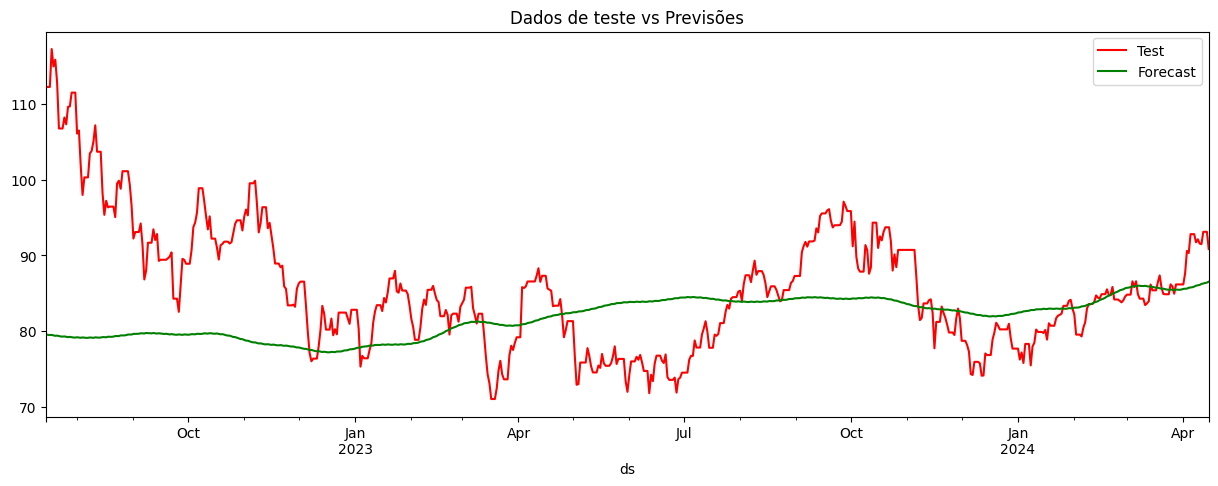

In [ ]:
# configurando a área de plotagem
f, ax = plt.subplots(figsize=(14,5))
# alterando a altura
f.set_figheight(5)
# alterando a largura
f.set_figwidth(15)
# plotando o gráfico com dados de teste
test.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
# plotando o gráfico com os dados previstos
test_forecast.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
# definindo o título
plt.title('Dados de teste vs Previsões')

In [ ]:
# criando a função MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape = mean_absolute_percentage_error(test['y'],test_forecast['yhat'])
print("MAPE",round(mape,4))

MAPE 7.9684


In [ ]:
#from sklearn.metrics import mean_absolute_error, mean_squared_error
# Avaliando o modelo
MAE = mean_absolute_error(test['y'],test_forecast['yhat'])
MSE = mean_squared_error(test['y'],test_forecast['yhat'])
print('MAE',MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
print('MSE',MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadráticos

MAE 7.161422478267968
MSE 97.4904005285121
